# Homogeneous Sphere
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  03/07/2024          |
| Updated |  03/08/2024          |

## [Quantities](https://github.com/PrincetonUniversity/athena/wiki/Non-relativistic-Radiation-Transport#units)

- Code Units
  - Temperature $T_0$
  - Density $\rho_0$
  - Length $L_0$
  - Time $t_0 = L_0 / v_0 = \mathbb{C}L_0 / c$
- Ideal Gas
  - Constant mean molecular weight $\mu$
  - Atomic mass constant $m_\mathrm{u}$
  - Gas velocity (isothermal sound speed) $v_0 = c_\mathrm{s,iso} = \sqrt{k_\mathrm{B} T_0 / (\mu m_\mathrm{u})}$
  - Pressure $P_0 \equiv k_\mathrm{B}\rho_0 T_0 / (\mu m_\mathrm{u}) = \rho_0 R_\mathrm{ideal} T_0$
  - Internal energy $E_\mathrm{g} = P/(\gamma_\mathrm{g} - 1)$ for adiabatic index $\gamma_\mathrm{g} \neq 1$
  - Temperature $T = P/(R_\mathrm{ideal}\rho) = E_\mathrm{g}(\gamma_\mathrm{g} - 1)/(R_\mathrm{ideal}\rho)$
- Radiation
  - Specific intensity $I\,[a_\mathrm{r}T_0^4]$
  - Energy density $E_\mathrm{r} = \int I\mathrm{d}\Omega$ (taking $4\pi = 1$)
  - Flux $\mathbf{F}_\mathrm{r} = \int\mathbf{n}I\mathrm{d}\Omega$ (units of $ca_\mathrm{r}T_0^4$)
- Dimensionless
  - $\mathbb{C} = \mathcal{C} \equiv c/v_0 = c/c_\mathrm{s,iso}$
  - $\mathbb{P} = \mathcal{P} \equiv a_\mathrm{r}T_0^4 / P_0 = a_\mathrm{r}T_0^4 / (\rho_0 R_\mathrm{ideal} T_0)$
- Sums
  - Total pressure (energy) $P_\mathrm{g} + \mathbb{P}P_\mathrm{r}\,[P_0]$
  - Total momentum $\rho v + F_\mathrm{r}\mathbb{P}/\mathbb{C}\,[\rho_0 v_0]$

## Athena++ Model

### Explicit RT

[Text(0.5, 0, '$r/L_0$')]

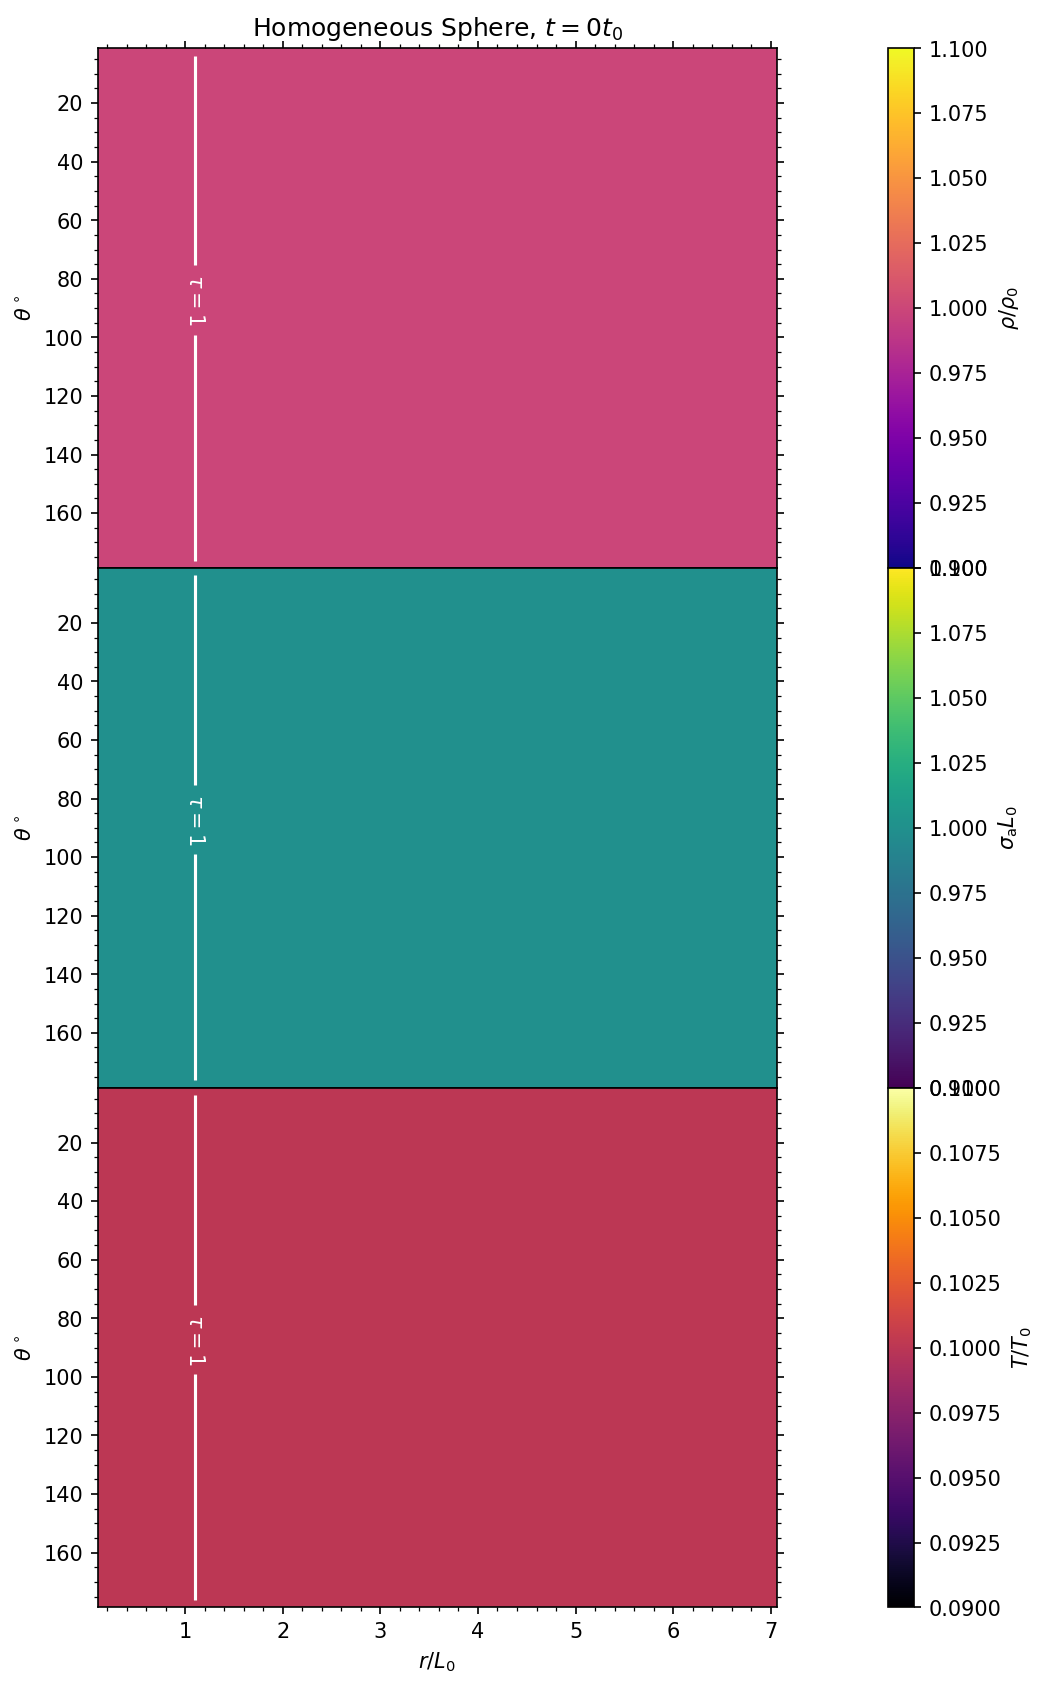

In [4]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(8, 13.5), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 0
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Density field
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, athdf['rho'][0],
                        cmap='plasma',)# norm=colors.LogNorm())
# Opacity field field
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg,
                        athdf['Sigma_a_0'][0], cmap='viridis',)
                        # norm=colors.LogNorm())
# Temperature field
im2 = axs[2].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg,
                        athdf['press'][0]/athdf['rho'][0], cmap='inferno',)
                        # norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_rho = plt.colorbar(im0, label=r'$\rho/\rho_0$', pad=0.12)
cbar_kappa_a = plt.colorbar(im1, label=r'$\sigma_\mathrm{a}L_0$', pad=0.12)
cbar_T = plt.colorbar(im2, label=r'$T/T_0$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.0f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[2].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

[Text(0.5, 0, '$r/L_0$')]

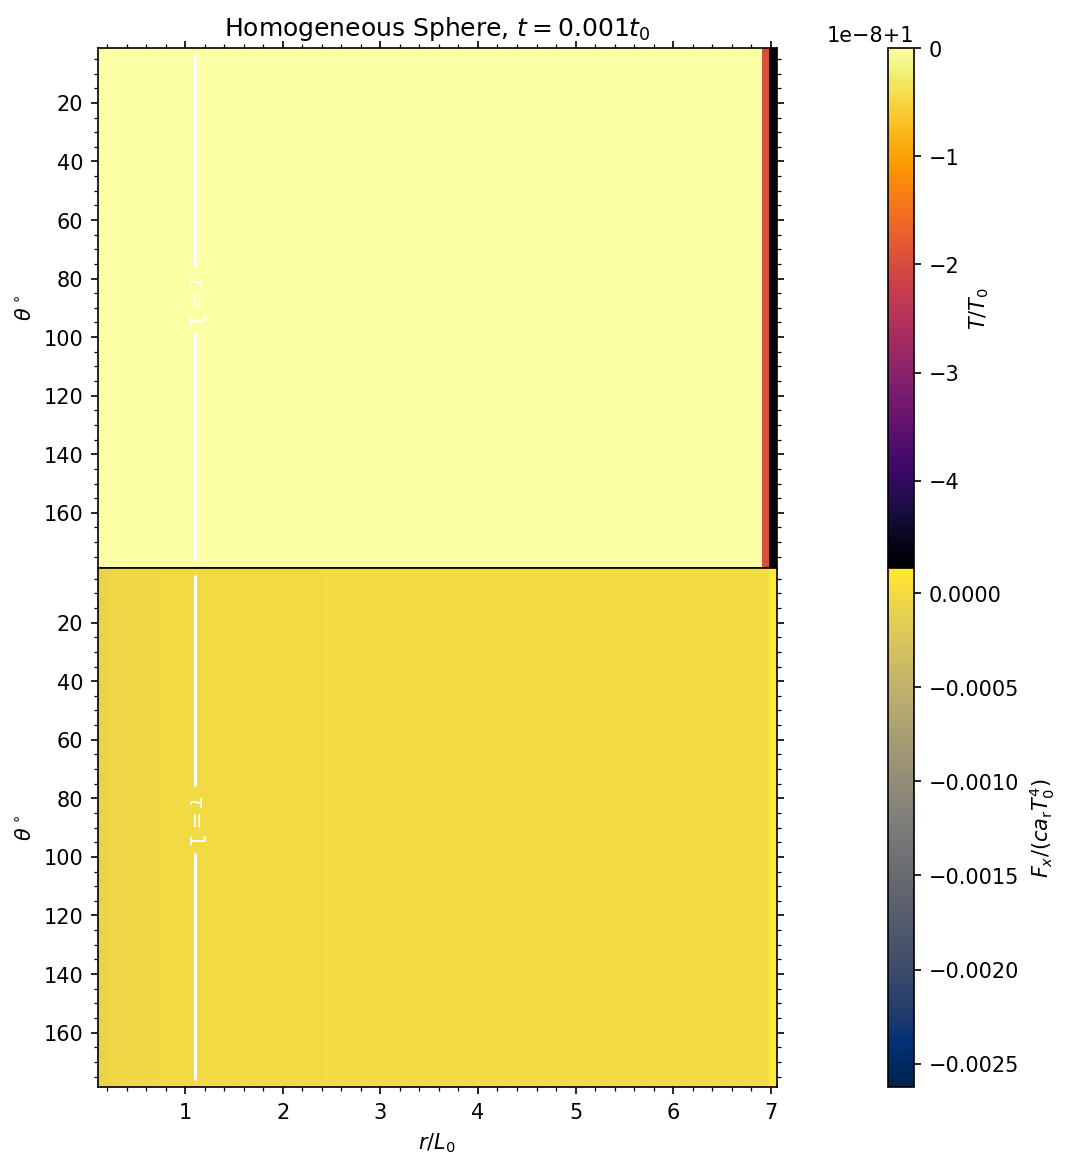

In [2]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 1
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

[Text(0.5, 0, '$r/L_0$')]

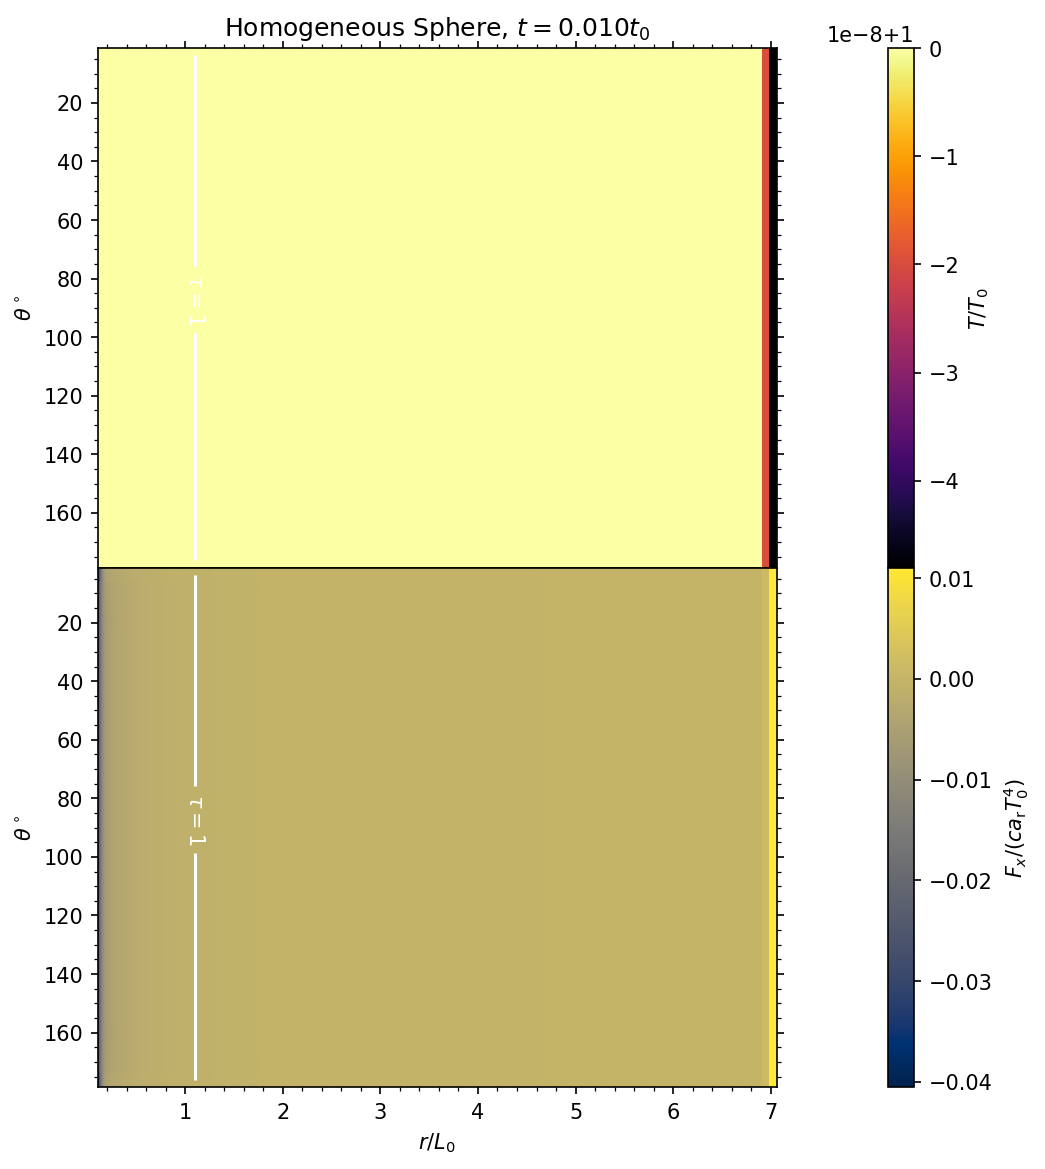

In [8]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 10
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

[Text(0.5, 0, '$r/L_0$')]

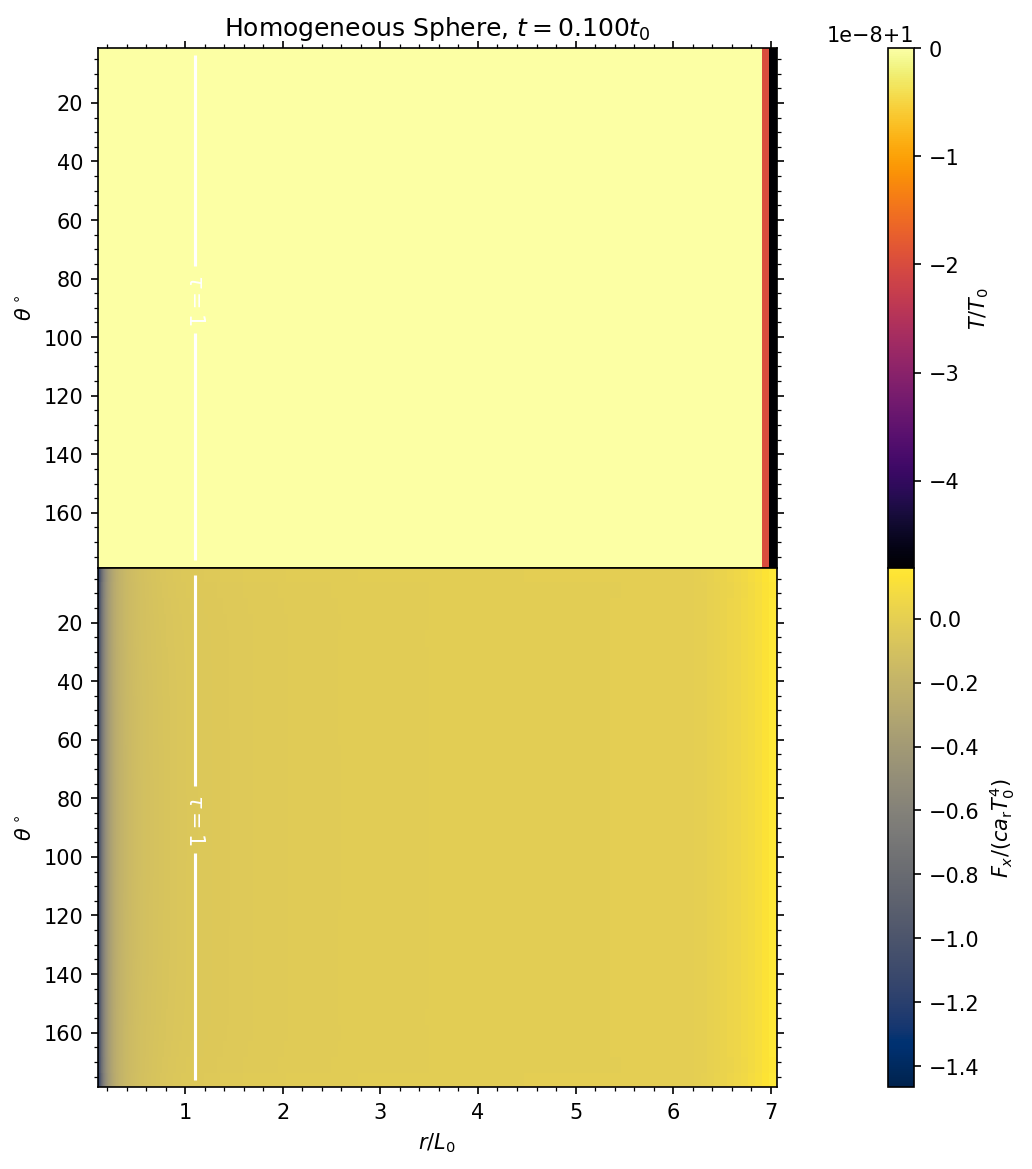

In [9]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 100
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

[Text(0.5, 0, '$r/L_0$')]

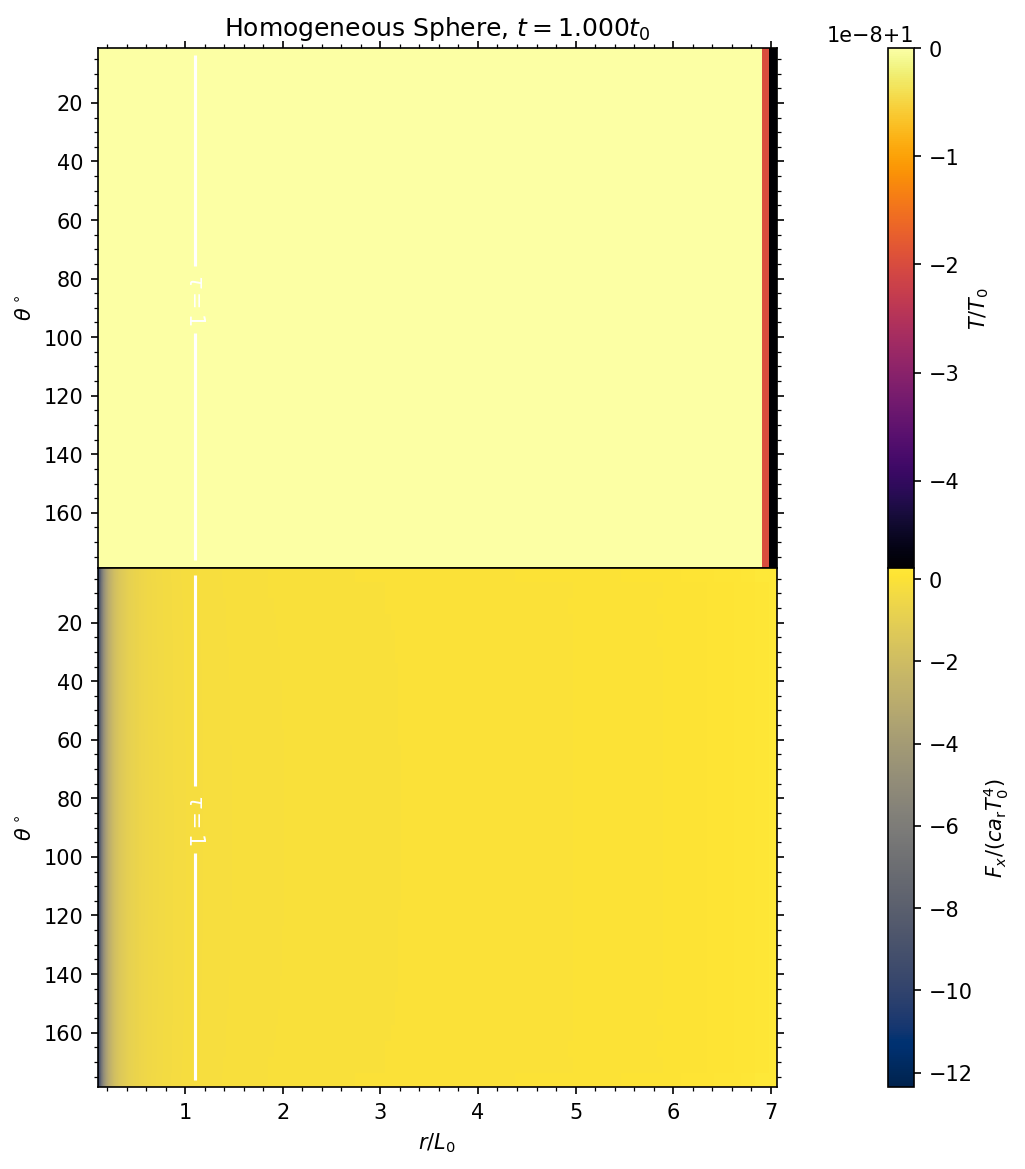

In [5]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 1000
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

[Text(0.5, 0, '$r/L_0$')]

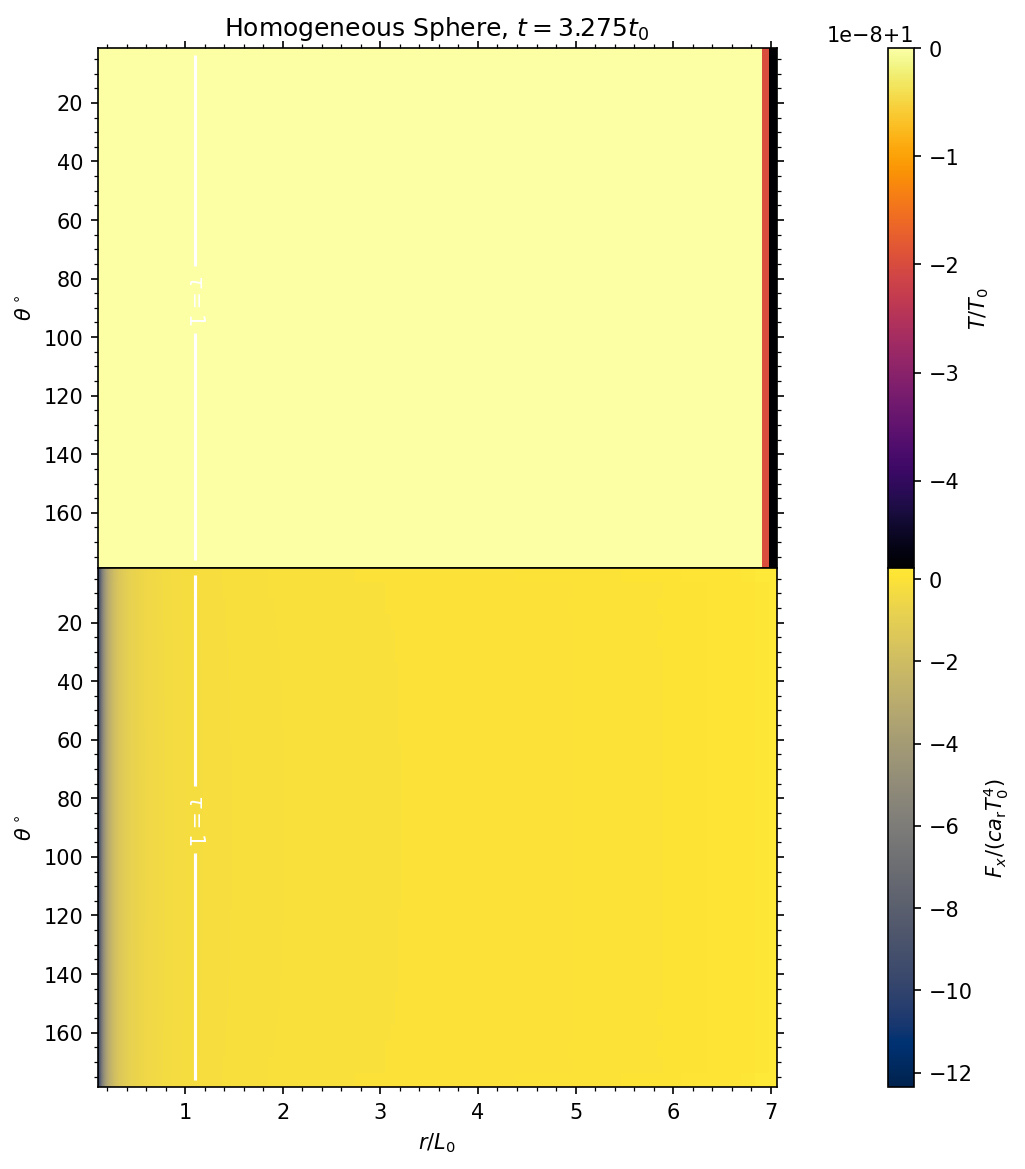

In [6]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'single'
out = 3275
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere, $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

#### $\mathbb{C} = 1$ (MPI)

[Text(0.5, 0, '$r/L_0$')]

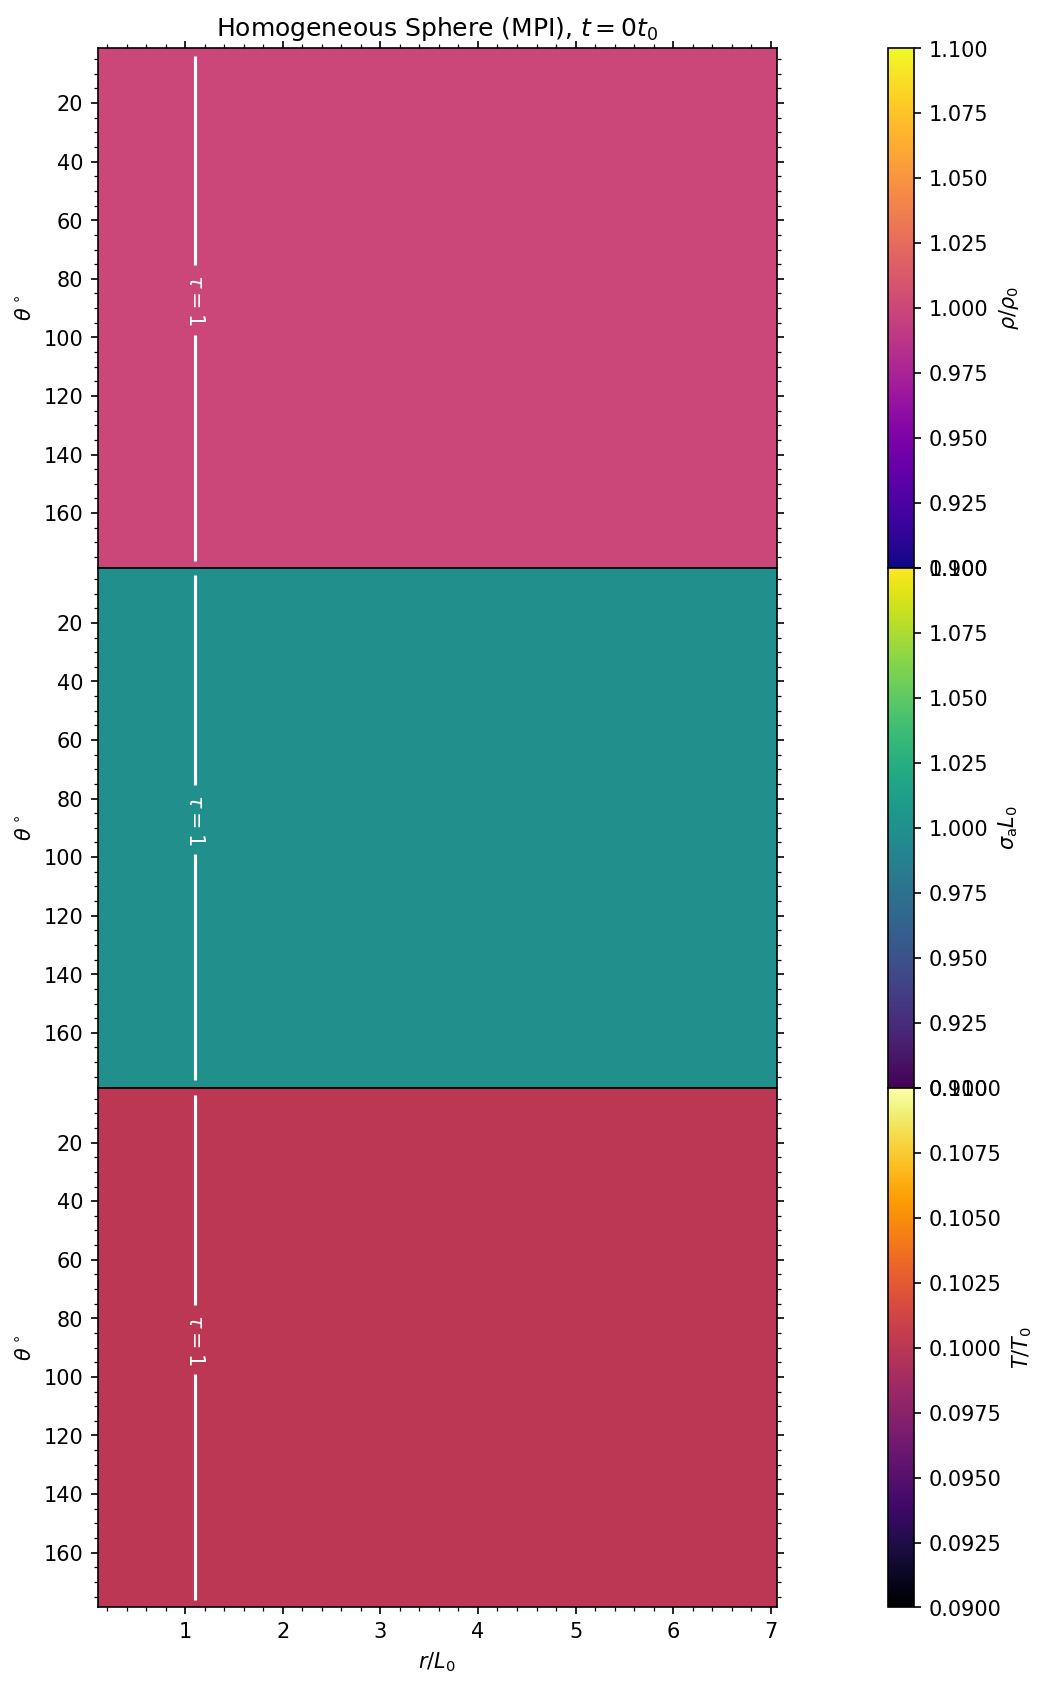

In [16]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(8, 13.5), dpi=150)
problem_id = 'hsphere'
path = 'mpi'
out = 0
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Density field
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, athdf['rho'][0],
                        cmap='plasma',)# norm=colors.LogNorm())
# Opacity field field
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg,
                        athdf['Sigma_a_0'][0], cmap='viridis',)
                        # norm=colors.LogNorm())
# Temperature field
im2 = axs[2].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg,
                        athdf['press'][0]/athdf['rho'][0], cmap='inferno',)
                        # norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_rho = plt.colorbar(im0, label=r'$\rho/\rho_0$', pad=0.12)
cbar_kappa_a = plt.colorbar(im1, label=r'$\sigma_\mathrm{a}L_0$', pad=0.12)
cbar_T = plt.colorbar(im2, label=r'$T/T_0$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere (MPI), $t={t:.0f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[2].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

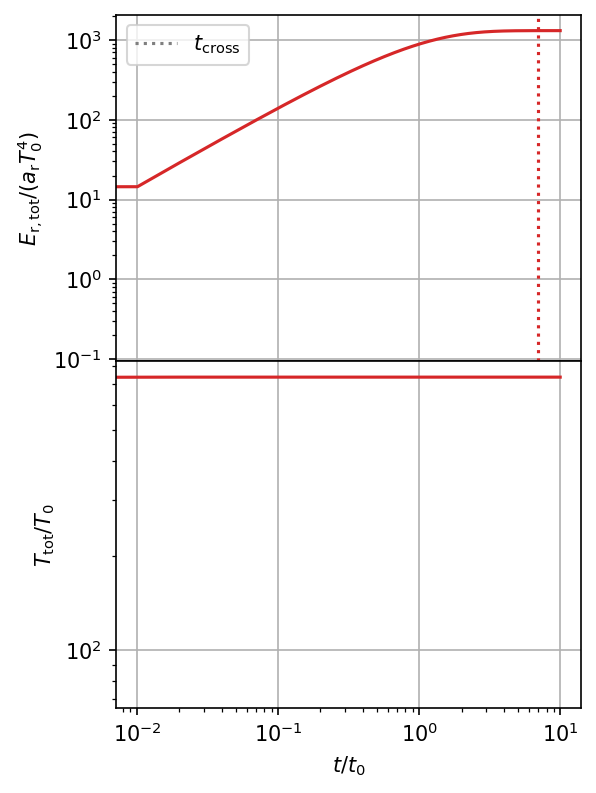

In [17]:
#===============================================================================
problem_id = 'hsphere'
nzetas = ['']
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4, 6), dpi=150)
tab_colors = ['tab:red', 'tab:orange', 'tab:green']
crat = None
theta = None

# Read and plot
for z, nzeta in enumerate(nzetas):
    path = f'mpi'
    athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
    Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
    Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
    Vtot = (Vmax - Vmin)/2
    gamma = athinput['hydro']['gamma']       # C_p/C_v = 1 + 2/DoF
    hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
    T = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']

    axs[0].plot(hst['time'], hst['Er'], tab_colors[z])
    axs[1].plot(hst['time'], T, tab_colors[z], label=f'{nzeta}')

    # Compute light crossing time for oblique beams
    Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
    with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
        lines = Rad_angles.read().splitlines()
        crat = float(lines[1].split()[1])
        mu = lines[33]
        mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
        theta = np.arctan(mu_y/mu_x)
        
    t_cross = Lx/np.cos(theta)/crat

    axs[0].axvline(t_cross, color=tab_colors[z], linestyle=':')

# Plot ghost point(s) for colorless linestyles
axs[0].plot([], [], 'tab:gray', linestyle=':', label=r'$t_\mathrm{cross}$')

# Format (sub)plots
for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xscale='log', yscale='log')

axs[0].legend()
axs[0].set(ylabel=r'$E_\mathrm{r,tot}/(a_\mathrm{r}T_0^4)$')
# axs[1].legend()#title=r'$n_\zeta$')
axs[1].set(ylabel=r'$T_\mathrm{tot}/T_0$', xlabel='$t/t_0$', xscale='log')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'NAME.jpg', bbox_inches='tight', pad_inches=0.01)

[Text(0.5, 0, '$r/L_0$')]

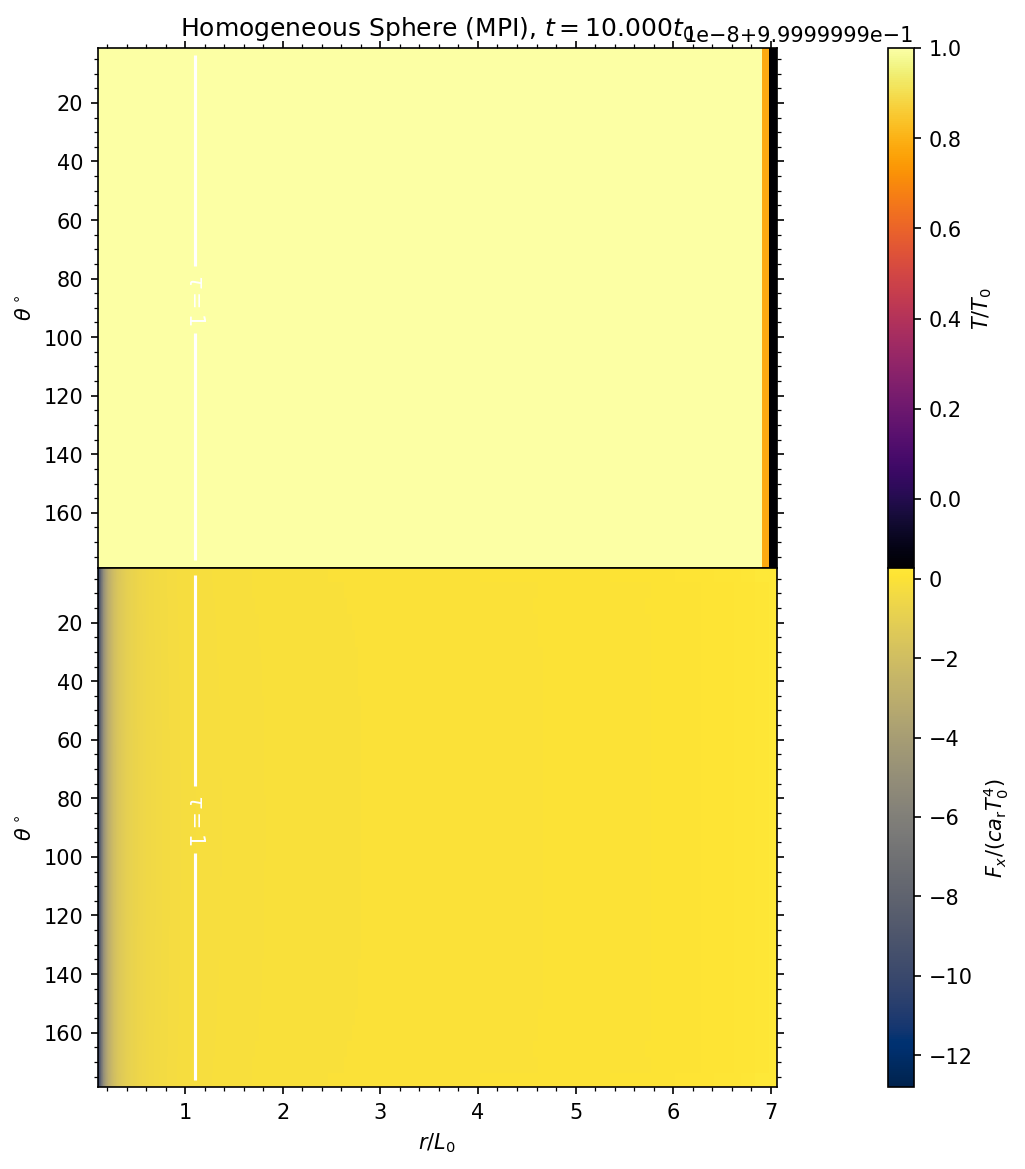

In [18]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = 'mpi'
out = 1
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere (MPI), $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

#### [113d1bb](https://github.com/sabaronett/athena/commit/113d1bb858c6d1c4f374231e3ca001798aa691c2)

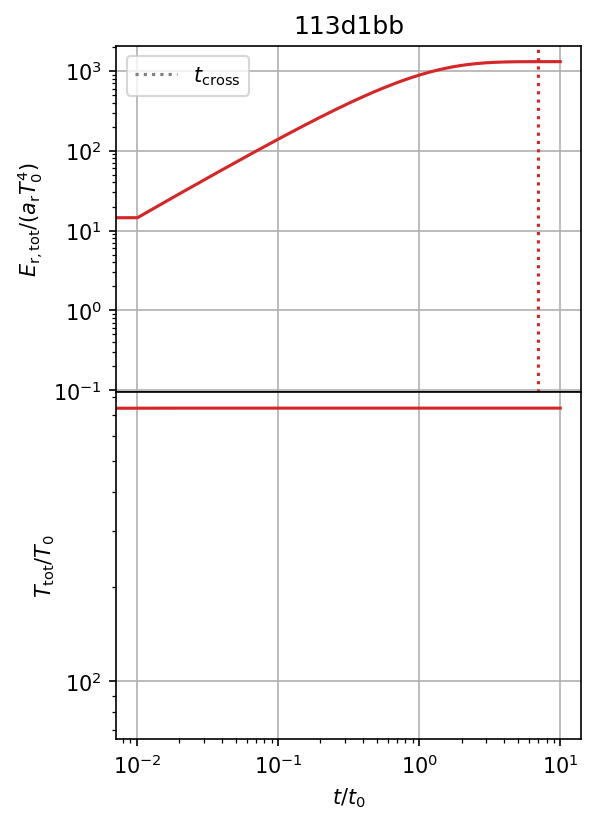

In [24]:
#===============================================================================
problem_id = 'hsphere'
nzetas = ['']
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4, 6), dpi=150)
tab_colors = ['tab:red', 'tab:orange', 'tab:green']
crat = None
theta = None

# Read and plot
for z, nzeta in enumerate(nzetas):
    path = f'113d1bb'
    athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
    Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
    Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
    Vtot = (Vmax - Vmin)/2
    gamma = athinput['hydro']['gamma']       # C_p/C_v = 1 + 2/DoF
    hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
    T = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']

    axs[0].plot(hst['time'], hst['Er'], tab_colors[z])
    axs[1].plot(hst['time'], T, tab_colors[z], label=f'{nzeta}')

    # Compute light crossing time for oblique beams
    Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
    with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
        lines = Rad_angles.read().splitlines()
        crat = float(lines[1].split()[1])
        mu = lines[33]
        mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
        theta = np.arctan(mu_y/mu_x)
        
    t_cross = Lx/np.cos(theta)/crat

    axs[0].axvline(t_cross, color=tab_colors[z], linestyle=':')

# Plot ghost point(s) for colorless linestyles
axs[0].plot([], [], 'tab:gray', linestyle=':', label=r'$t_\mathrm{cross}$')

# Format (sub)plots
for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xscale='log', yscale='log')

axs[0].legend()
axs[0].set(ylabel=r'$E_\mathrm{r,tot}/(a_\mathrm{r}T_0^4)$', title=f'{path}')
# axs[1].legend()#title=r'$n_\zeta$')
axs[1].set(ylabel=r'$T_\mathrm{tot}/T_0$', xlabel='$t/t_0$', xscale='log')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'NAME.jpg', bbox_inches='tight', pad_inches=0.01)

[Text(0.5, 0, '$r/L_0$')]

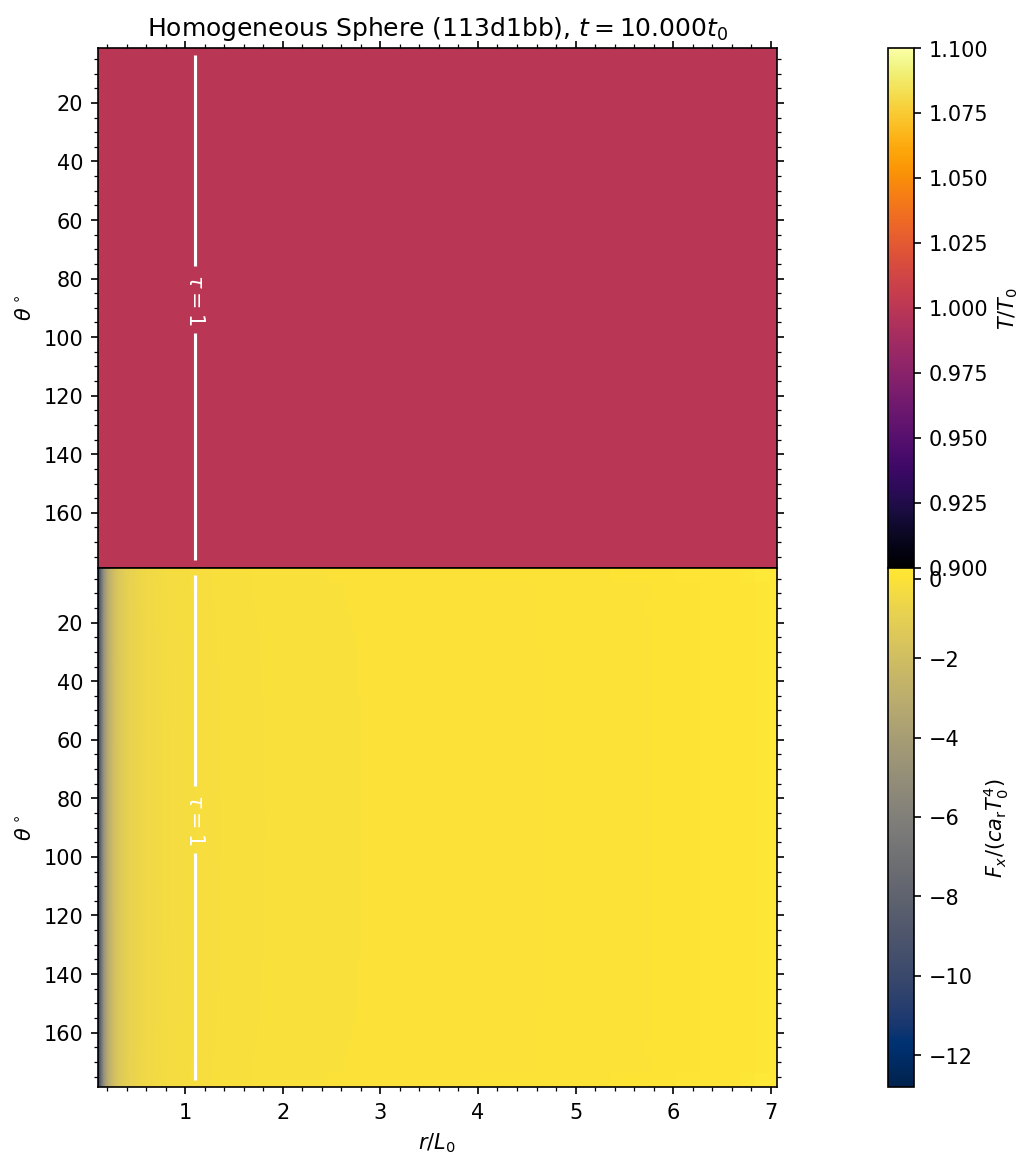

In [23]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = '113d1bb'
out = 1
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere ({path}), $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')

#### [0b7ce30](https://github.com/sabaronett/athena/commit/0b7ce305d1c11b30ddc96400c6e0c61562df1867)

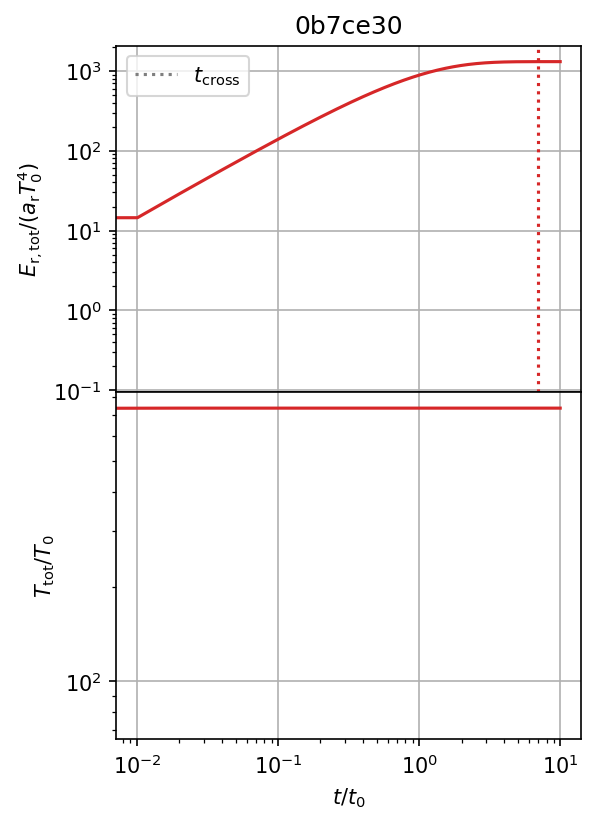

In [25]:
#===============================================================================
problem_id = 'hsphere'
nzetas = ['']
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(4, 6), dpi=150)
tab_colors = ['tab:red', 'tab:orange', 'tab:green']
crat = None
theta = None

# Read and plot
for z, nzeta in enumerate(nzetas):
    path = f'0b7ce30'
    athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
    Vmax = 4/3*np.pi*athinput['mesh']['x1max']**3
    Vmin = 4/3*np.pi*athinput['mesh']['x1min']**3
    Vtot = (Vmax - Vmin)/2
    gamma = athinput['hydro']['gamma']       # C_p/C_v = 1 + 2/DoF
    hst = athena_read.hst(f'{path}/output/{problem_id}.hst')
    T = hst['tot-E']*(gamma - 1)*Vtot/hst['mass']

    axs[0].plot(hst['time'], hst['Er'], tab_colors[z])
    axs[1].plot(hst['time'], T, tab_colors[z], label=f'{nzeta}')

    # Compute light crossing time for oblique beams
    Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min']
    with open(f'{path}/output/Rad_angles.txt') as Rad_angles:
        lines = Rad_angles.read().splitlines()
        crat = float(lines[1].split()[1])
        mu = lines[33]
        mu_x, mu_y = float(mu.split()[1]), float(mu.split()[2])
        theta = np.arctan(mu_y/mu_x)
        
    t_cross = Lx/np.cos(theta)/crat

    axs[0].axvline(t_cross, color=tab_colors[z], linestyle=':')

# Plot ghost point(s) for colorless linestyles
axs[0].plot([], [], 'tab:gray', linestyle=':', label=r'$t_\mathrm{cross}$')

# Format (sub)plots
for ax in axs:
    ax.grid()
    ax.minorticks_on()
    ax.set(xscale='log', yscale='log')

axs[0].legend()
axs[0].set(ylabel=r'$E_\mathrm{r,tot}/(a_\mathrm{r}T_0^4)$', title=f'{path}')
# axs[1].legend()#title=r'$n_\zeta$')
axs[1].set(ylabel=r'$T_\mathrm{tot}/T_0$', xlabel='$t/t_0$', xscale='log')
plt.subplots_adjust(hspace=0)
# plt.savefig(f'NAME.jpg', bbox_inches='tight', pad_inches=0.01)

[Text(0.5, 0, '$r/L_0$')]

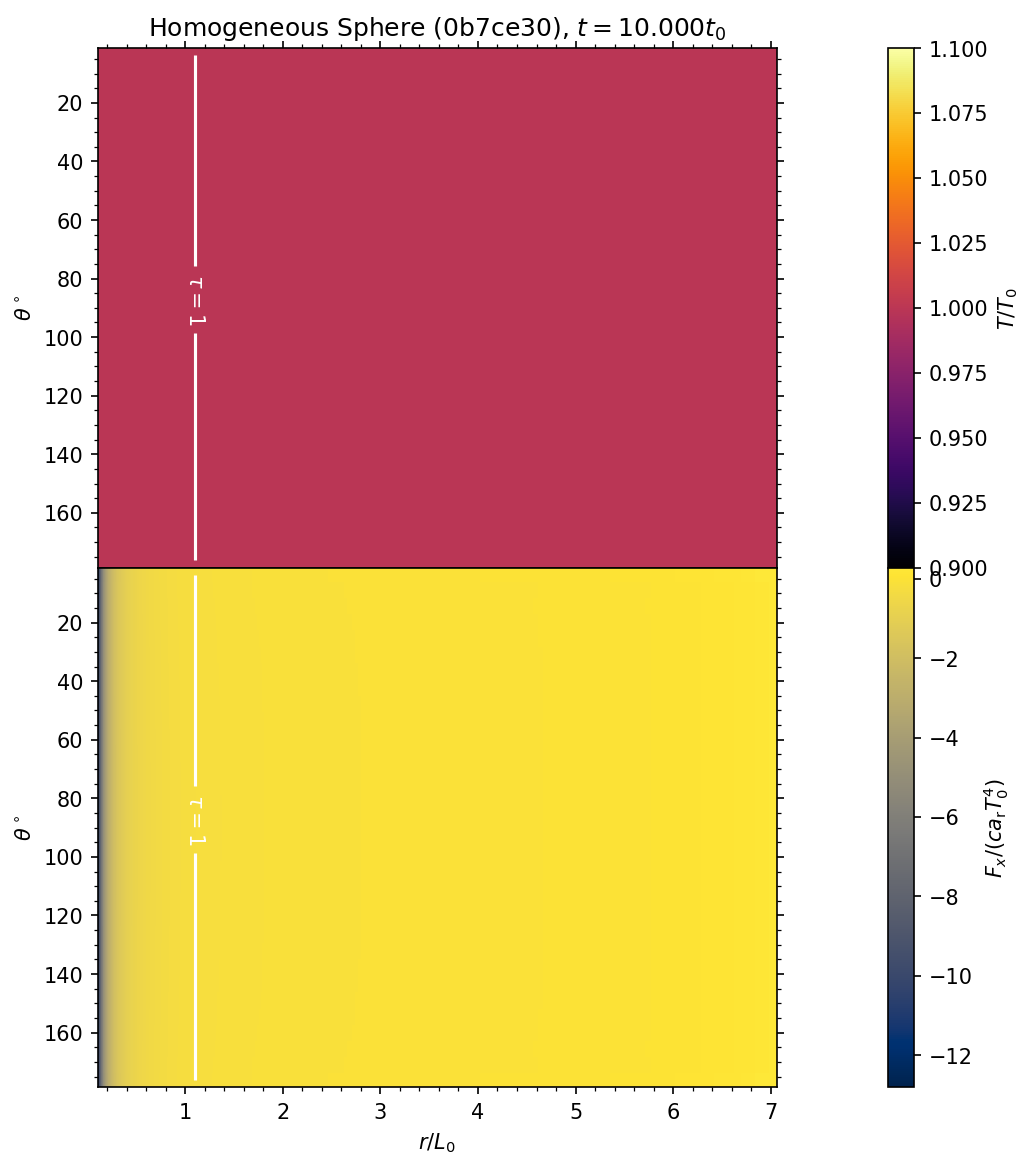

In [26]:
#===============================================================================
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

def fmt(x):
  return rf'$\tau={x:.0f}$'

# Conversions
rad2deg          = 180/np.pi           # [deg]

# Read and plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 9), dpi=150)
problem_id = 'hsphere'
path = '0b7ce30'
out = 1
athinput = athena_read.athinput(f'{path}/athinput.homogeneous_sphere')
athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.{out:05d}.athdf')
t = athdf['Time']
# Temperature field
T_field = athdf['press'][0]/athdf['rho'][0]
im0 = axs[0].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, T_field,
                        cmap='inferno')
# Radial flux field
Fx_field = athdf['Fr1'][0]
im1 = axs[1].pcolormesh(athdf['x1v'], athdf['x2v']*rad2deg, Fx_field,
                        cmap='cividis',)# norm=colors.LogNorm())
# tau = 1 surface
dtau = athdf['Sigma_a_0'][0]*np.diff(athdf['x1f'])
tau_field = np.cumsum(dtau, axis=1)

cbar_T = plt.colorbar(im0, label=r'$T/T_0$', pad=0.12)
cbar_F = plt.colorbar(im1, label='$F_x/(ca_\mathrm{r}T_0^4)$', pad=0.12)

# Format (sub)plots
for i, ax in enumerate(axs):
  CS = ax.contour(athdf['x1v'], athdf['x2v']*rad2deg, tau_field,
                  [1, 1e4], colors=['white', 'white'])
  ax.clabel(CS, CS.levels, fmt=fmt)
  ax.invert_yaxis()
  ax.minorticks_on()
  ax.set(ylabel=r'$\theta^\circ$')
  ax.tick_params(axis='both', which='both', right=True)

plt.subplots_adjust(hspace=0)
axs[0].set(title=rf'Homogeneous Sphere ({path}), $t={t:.3f}t_0$')
axs[0].tick_params(axis='both', which='both', top=True, right=True)
axs[1].set(xlabel='$r/L_0$')

# plt.savefig(f'{path}/temp/Fr1({t:.2f}t_0).jpg', bbox_inches='tight')